# **FIND SIMILAR IMAGES**

*Summary of this notebook:*  
Calculate embedding for the data and use K_Nearest_Neighbors to create clusters of the images.

Load the data that you want in a feature map
Create a feature map by extracting embeddings for a set of data
Run K-nearest neighbor on whatever single item of data you want. 

In this case, we are working on the MSFC Clouds dataset

*Definition of Done:*

In [ ]:
import os

# Import google drive and select a root directory
from google.colab import drive
drive.mount("/content/gdrive")

# !ls -lht /content/gdrive

# ROOT_DIR = "/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/nasa_impact/cloudstreet_smaller/"
ROOT_DIR = "/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code"
os.chdir(ROOT_DIR)
# !ls -lht $ROOT_DIR

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pickle
from tqdm import tqdm, tqdm_notebook
import random
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import PIL
from PIL import Image
from sklearn.neighbors import NearestNeighbors

import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
# Get the filenames, feature list (embeddings), and classification for the feature extraction done in part 2
# Class_ids are binary. Cloud street or not. 
# filenames = pickle.load(open('/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/nasa_impact/cloudstreet_smaller/filenames-nasa-impact-cloudstreet-smaller.pickle', 'rb'))
# feature_list = pickle.load(open('/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/nasa_impact/cloudstreet_smaller/features-nasa-impact-cloudstreet-smaller-resnet.pickle', 'rb'))
# class_ids = pickle.load(open('/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/nasa_impact/cloudstreet_smaller/class_ids-nasa-impact-cloudstreet-smaller.pickle', 'rb'))

modelName = "UNETcustomGCP"
dataset = "MODIS_MCD43A4"

dataPath = ("Datasets/"+ dataset+ "/Globe/Test/test_set/")
image_globs=glob.glob(dataPath+'/*/np_arrays/*.npy')

filenames = image_globs
feature_list = pickle.load(open("Features/" + modelName + "_" + dataset + "_features.pkl", 'rb'))

In [ ]:
# extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG', '.tif']
 
# def get_file_list(root_dir):
#     file_list = []
#     for root, directories, filenames in os.walk(root_dir):
#         for filename in filenames:
#             print("filename:", filename)
#             if any(ext in filename for ext in extensions):
#                 file_list.append(os.path.join(root, filename))
#     return file_list

# filenames = sorted(get_file_list(ROOT_DIR))

In [ ]:
num_images = len(filenames)
num_features_per_image = len(feature_list[0])
print("Number of images = ", num_images)
print("Number of features per image = ", num_features_per_image)

Number of images =  2880
Number of features per image =  4608


In [ ]:
# Use scikit-learn to find Nearest Neighbors
# Takes the distance between each embedding for every embedding. 
# num_neighbors = num_images - 1
neighbors = NearestNeighbors(n_neighbors=2800,
                             algorithm='brute',
                             metric='euclidean').fit(feature_list)


In [ ]:
# Look at the two closest images in Eucledian distance for any given image

random_index = 2
# KNN distance to all the neighbors with the reference image
distances, indices = neighbors.kneighbors([feature_list[random_index]])

# KNN distance to all the neighbors with the reference image and it's farthest counter image.
A = neighbors.kneighbors_graph([feature_list[random_index], feature_list[indices[0,-1]]], n_neighbors=2800, mode='distance')

# Now we need to find the image that is farthest to both of the above mentioned images.
# So we choose the image that have the maximum sum of the two distances.
combined_distance = np.sum(A.toarray(), axis=0)   # computing sum
sorted_idx = np.argsort(combined_distance)        # sorting the index to get the image with max sum

print(sorted_idx[:50])                     # index of interest
print(A.toarray()[:, sorted_idx[:50]])     # the selected distances

[ 279  276 2812  274  271  270  269  268  267  291   39  278   27   15
  864  916  273  272 2244 2213 1829 2210 2209 2207 1833  661 2256 1806
 2262 2264 2265 2266  662 2267 2203 2268 2202 2253 1816 2252 2215 1817
 2242 2241 2240 2239 2238 2237 2236 2233]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.6840643e+04
  3.9681469e+04 0.0000000e+00 0.0000000e+00 4.0734594e+05 5.0993350e+05
  3.0963641e+05 3.4554034e+05 1.3814705e+06 4.6563375e+05 1.4360006e+06
  1.9410291e+05 4.3008772e+05 1.4360006e+06 2.7760169e+05 1.6586217e+05
  3.5910116e+05 3.1068706e+05 3.4710519e+05 3.2338084e+05 1.5941981e+05
  2.1466319e+05 3.7719397e+05 3.8654269e+05 4.3638862e+05 1.6606216e+05
  2.9667112e+05 1.4360006e+06 3.6435644e+05 2.7519812e+05 2.1528781e+05
  1.9084539e+05 1.2281681e+06 3.7722050e+05 2.1979319e+05 2.9739909e+05]
 [0.0000000e+00 0.000000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11 (400, 400, 3)


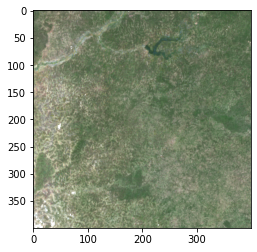

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


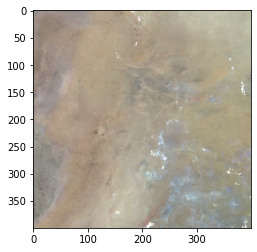

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


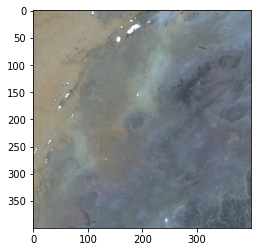

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


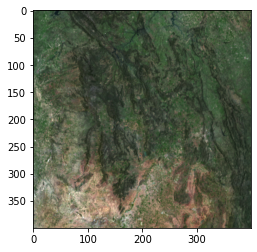

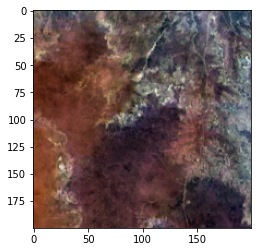

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


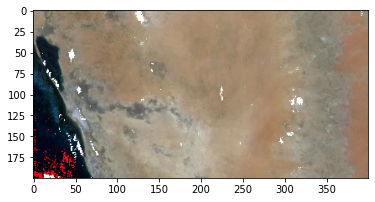

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


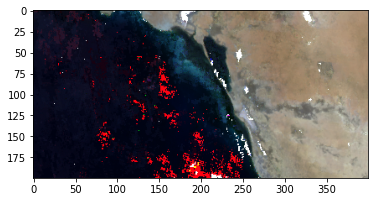

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


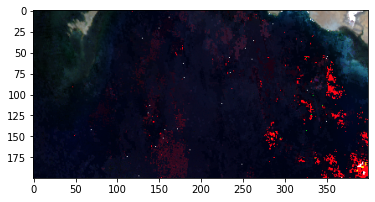

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


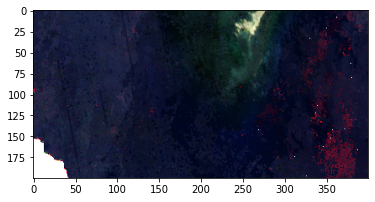

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


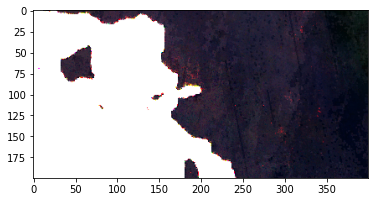

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


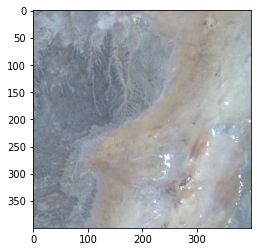

In [ ]:
# img_idx = [2]
img_idx = [2, *sorted_idx[:10]]
# img_idx = [2, *sorted_idx[-1:-10:-1]]

fnpy = [np.load(filenames[idx]) for idx in img_idx]
print(len(fnpy), fnpy[0].shape)


# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
  array_min, array_max = array.min(), array.max()
  return (array - array_min) / (array_max - array_min)

for i, elem in enumerate(fnpy):
  cloud_idx = [elem==32767]
  elem[cloud_idx] = 0
  final_img = np.dstack([normalize(elem[:,:,0]), normalize(elem[:,:,1]), normalize(elem[:,:,2])])
  final_img[cloud_idx] = 32767

  plt.imshow(final_img)
  plt.show()

In [ ]:
# Plots the five closest images to target 

plt.figure(20)
plt.imshow(mpimg.imread(filenames[random_index]), interpolation='lanczos')

for i in range(1, 5):
  plt.figure(i)
  plt.imshow(mpimg.imread(filenames[indices[0,i]]), interpolation='lanczos')

plt.show()

In [ ]:
# Plots the five furthest images to target 
plt.figure(20)
plt.imshow(mpimg.imread(filenames[random_index]), interpolation='lanczos')

for i in range(1,5):

  plt.figure(i)
  plt.imshow(mpimg.imread(filenames[indices[0,-i]]), interpolation='lanczos')


plt.show()

In [ ]:
print(*sorted_idx[-1:-10:-1])

3 519 2815 902 918 917 915 914 913
